Importing Libraries

In [180]:
import pandas as pd
df = pd.read_csv('B.csv')
print("Importing Dataset")
df.head()

Importing Dataset


,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


Distributing Dataset into Dependent and Independent Data

In [183]:
X = df.iloc[:, 3:].values
y = df.iloc[:, 1].values

Distributing Dataset into Dependent and Independent Data


Labelling Of dependent data as 0 and 1

In [184]:
print("Values of y before Labelling:")
print(y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print("Values of y after Labelling:")
print(y)

Values of y before Labelling:
['N' 'N' 'N' 'N' 'R' 'R' 'N' 'R' 'N' 'N' 'N' 'N' 'N' 'R' 'N' 'R' 'N' 'R'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'R' 'N'
 'N' 'R' 'N' 'R' 'R' 'N' 'R' 'R' 'N' 'N' 'R' 'N' 'R' 'N' 'R' 'N' 'N' 'N'
 'N' 'N' 'R' 'N' 'N' 'R' 'N' 'N' 'R' 'N' 'N' 'N' 'N' 'R' 'N' 'R' 'N' 'N'
 'N' 'N' 'N' 'R' 'N' 'N' 'N' 'N' 'N' 'R' 'N' 'N' 'N' 'N' 'N' 'N' 'R' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'R' 'N' 'N'
 'N' 'R' 'R' 'N' 'R' 'N' 'R' 'N' 'N' 'N' 'N' 'N' 'R' 'N' 'N' 'N' 'N' 'R'
 'N' 'N' 'R' 'R' 'N' 'R' 'R' 'N' 'N' 'R' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'R'
 'N' 'R' 'N' 'R' 'N' 'N' 'R' 'N' 'R' 'N' 'N' 'R' 'N' 'R' 'N' 'R' 'N' 'R'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'R' 'R' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'R' 'N']
Values of y after Labelling:
[0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1

In [185]:
le.transform(['N', 'R'])

array([0, 1])

Replacing missing values with the mean values:-

In [0]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,3:])
X[:,3:] = imputer.transform(X[:,3:])

In [187]:
print(X[:, -1])

[ 5.          2.          0.          0.          0.          0.
  3.21134021 10.          1.         20.          0.          0.
  0.          6.          0.          1.          0.          1.
  0.          1.          0.         13.          0.          0.
  2.          1.          0.          0.          3.21134021 13.
 10.          0.          0.          0.          0.          1.
  1.          0.          1.          0.         13.          6.
  0.          1.          0.          4.          2.          0.
  1.          0.          2.          1.          0.          0.
  4.          2.          1.         17.          0.         15.
 11.          0.          9.          0.          8.          1.
  0.          7.          2.          0.          3.          1.
  2.          1.          1.          4.          7.          1.
  0.          3.          0.          4.          9.          0.
  1.          3.21134021 14.          0.          0.          0.
  1.          0.         

Comparing the count of N and R:

N    151
R     47
Name: Outcome, dtype: int64


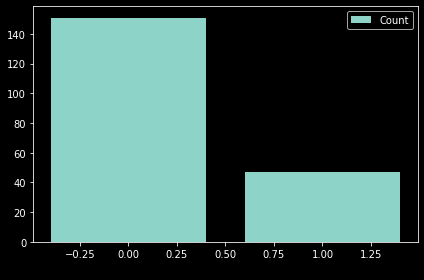

In [196]:
R, N = df['Outcome'].value_counts()
s = [R,N]
print(df['Outcome'].value_counts())
import matplotlib.pyplot as plt
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar([0,1], s,align='center',
            label='Count')
    plt.ylabel('')
    plt.xlabel(' ')
    plt.legend(loc='best')
    plt.tight_layout()

Obsering the Impact of Mean values to the dependent data:

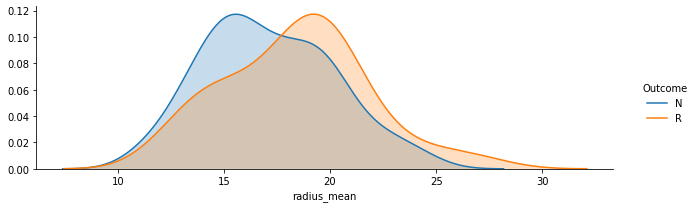

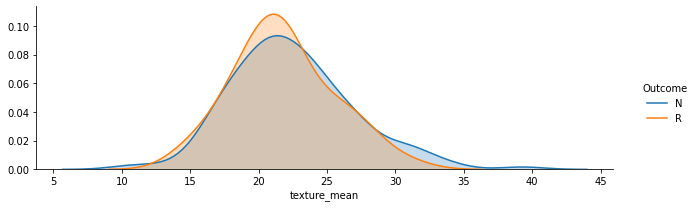

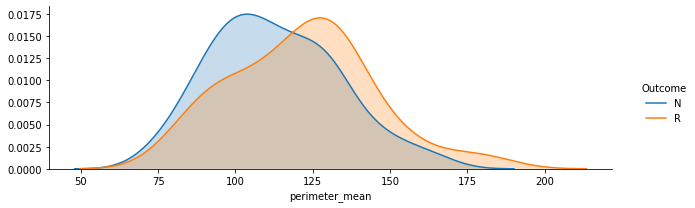

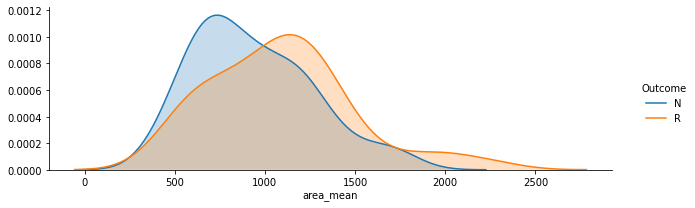

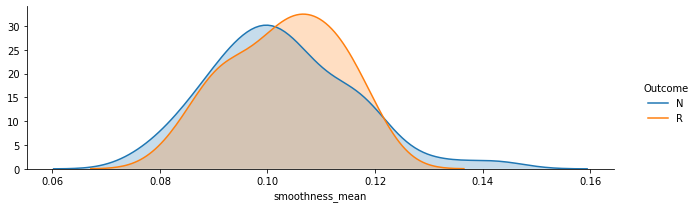

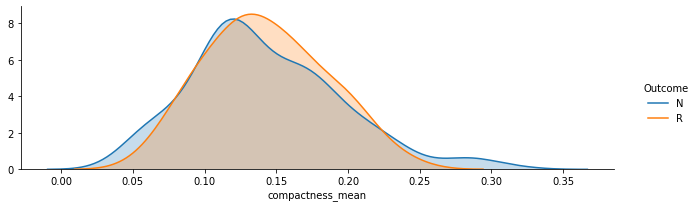

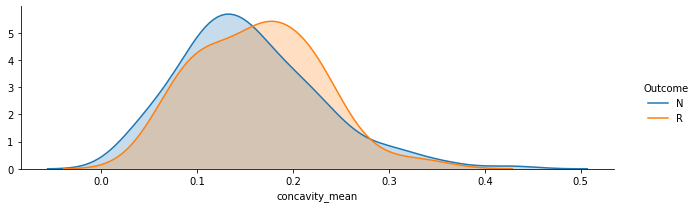

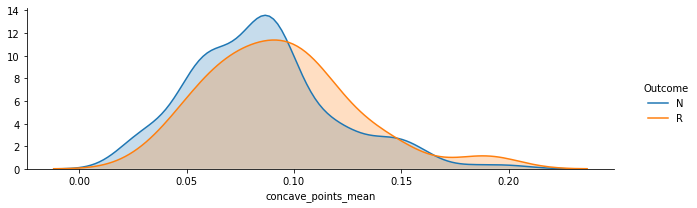

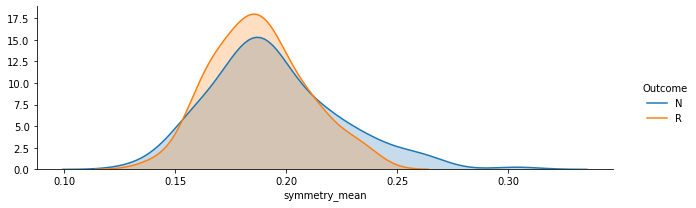

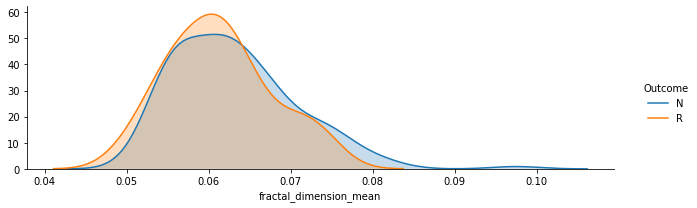

In [197]:
import seaborn as sns
mean_col = [col for col in df.columns if col.endswith('_mean')]
for i in range(len(mean_col)):
    sns.FacetGrid(df,hue="Outcome",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend()

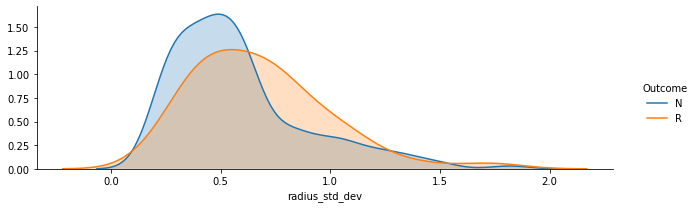

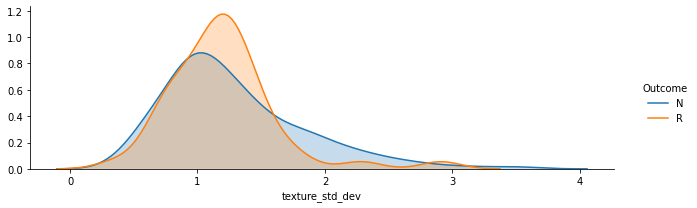

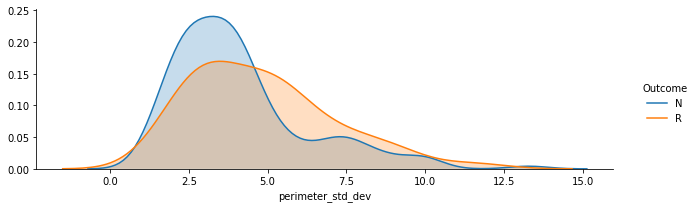

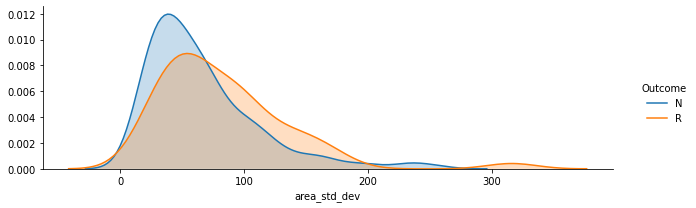

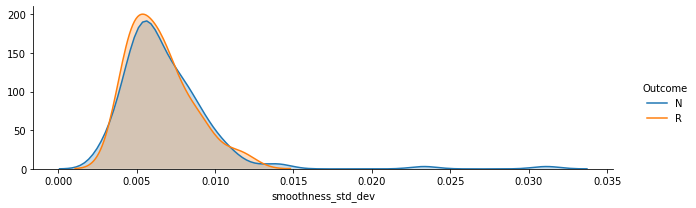

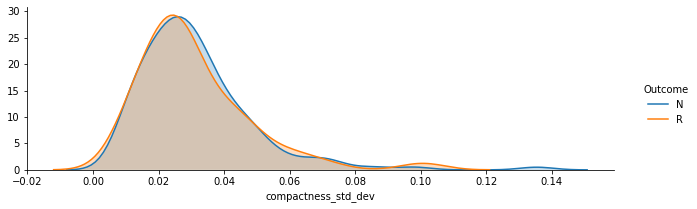

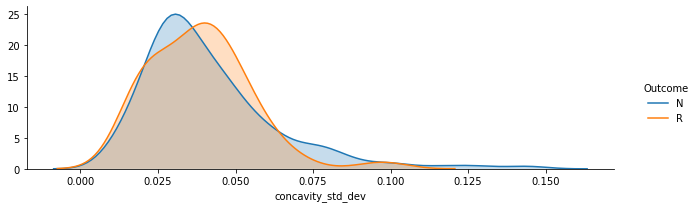

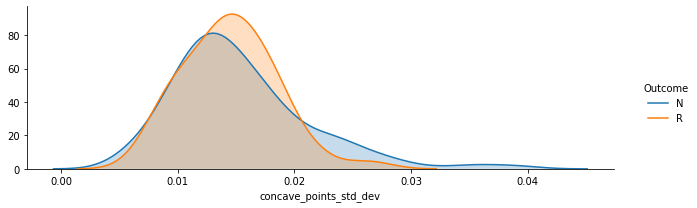

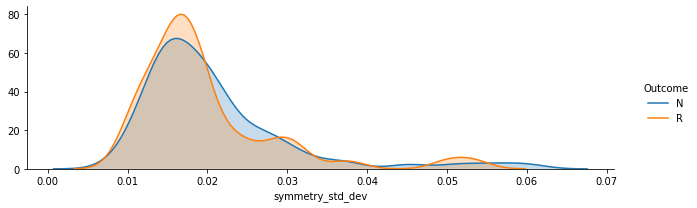

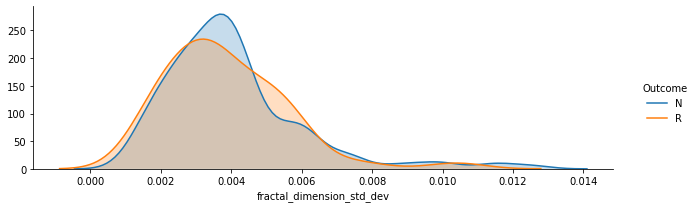

In [198]:
import seaborn as sns
mean_col = [col for col in df.columns if col.endswith('_std_dev')]
for i in range(len(mean_col)):
    sns.FacetGrid(df,hue="Outcome",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend()

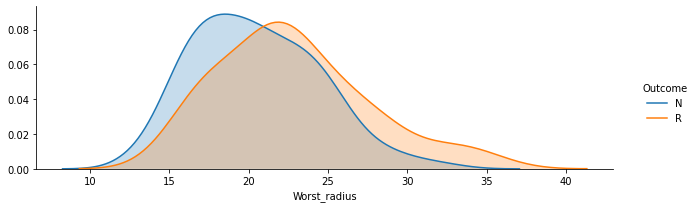

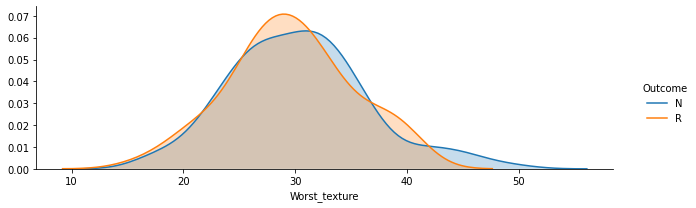

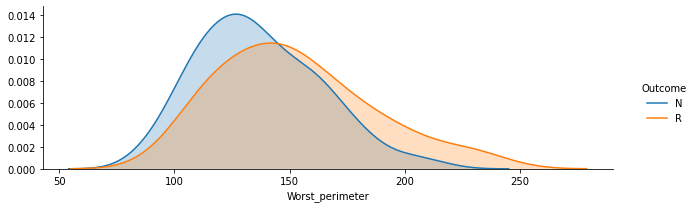

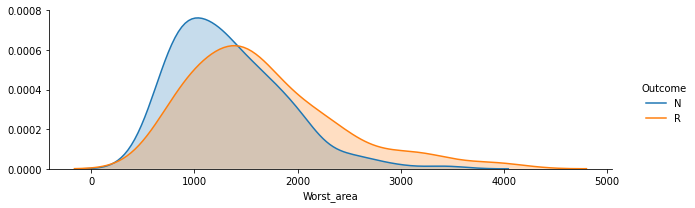

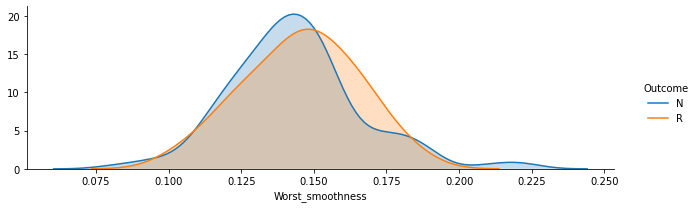

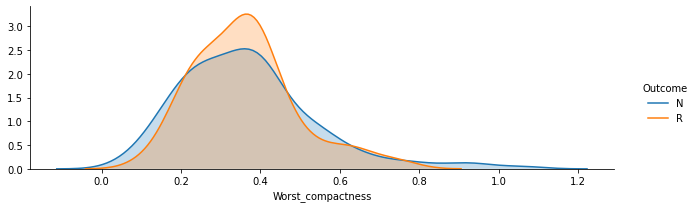

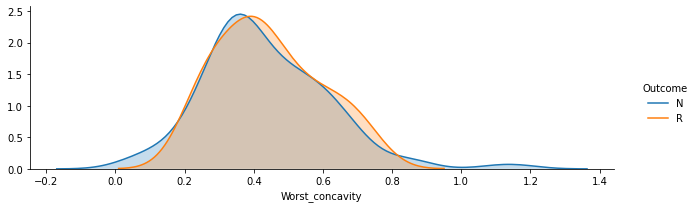

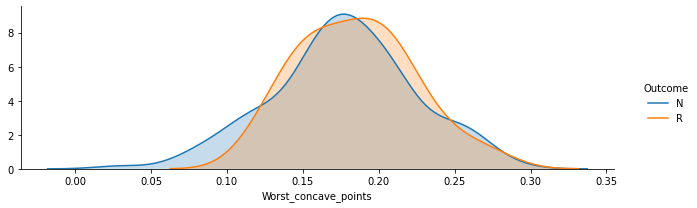

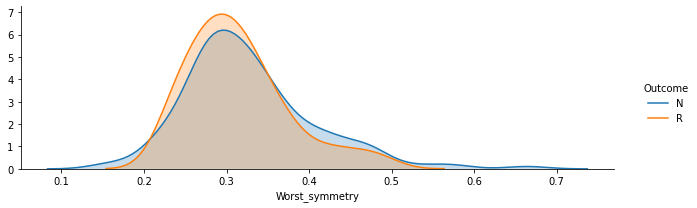

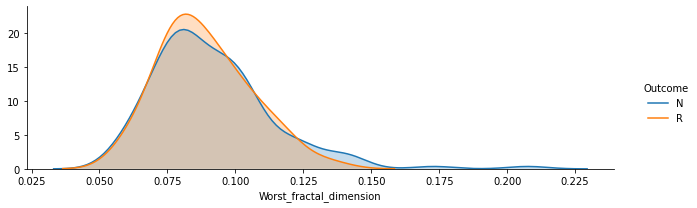

In [199]:
import seaborn as sns
mean_col = [col for col in df.columns if col.startswith('Worst_')]
for i in range(len(mean_col)):
    sns.FacetGrid(df,hue="Outcome",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend()

Correlation Between features

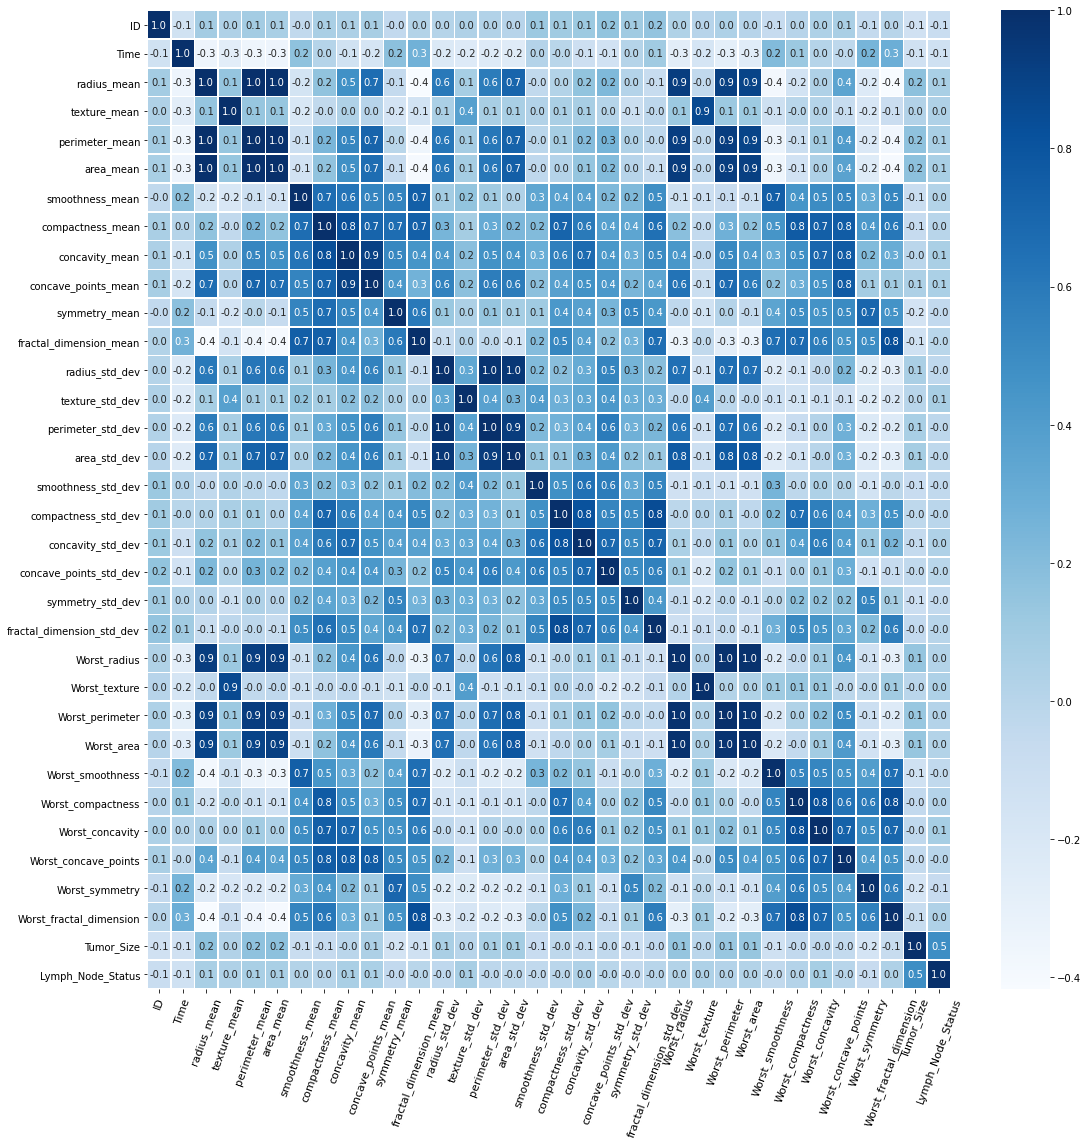

In [201]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

SVM Classification

In [0]:
from sklearn.svm import SVC
from sklearn import metrics

In [0]:

from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Benign','Malignant']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, _ = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test)
    import csv
    with open('prediction.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(pred)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")

On rbf kernel:


Confusion Matrix:
[[53  0]
 [13  0]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        53
           1       0.00      0.00      0.00        13

    accuracy                           0.80        66
   macro avg       0.40      0.50      0.45        66
weighted avg       0.64      0.80      0.72        66



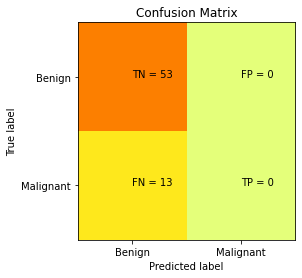

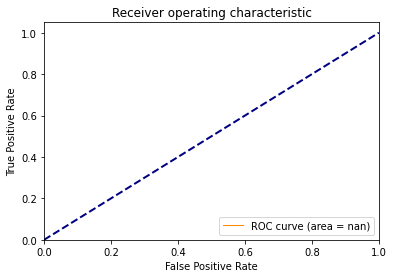


Acuuracy Of the Model:  0.803030303030303 




In [230]:
for i in ['rbf']:
    clf = SVC(kernel=i)
    clf.fit(X_train,y_train)
    print("On "+ i + " kernel:" )
    report_performance(clf)
    roc_curves(clf)
    accuracy(clf)

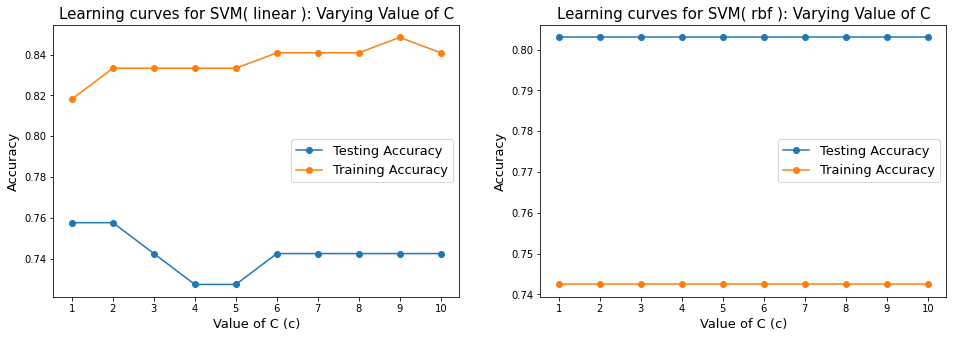

In [231]:
fig = plt.figure(figsize=(16,5))
def plotlc(kernel=None,k=0):
    plt.subplot(k)
    cp = np.arange(1, 11)
    train_accuracy = np.empty(len(cp))
    test_accuracy = np.empty(len(cp))
    for i, c in enumerate(cp):
        clf = SVC(C=c,kernel = kernel)
        clf.fit(X_train, y_train)
        train_accuracy[i] = clf.score(X_train, y_train)
        test_accuracy[i] = clf.score(X_test, y_test)

    plt.title('Learning curves for SVM( '+ kernel+' ): Varying Value of C', size=15)
    plt.plot(cp, test_accuracy, marker ='o', label = 'Testing Accuracy')
    plt.plot(cp, train_accuracy, marker ='o', label = 'Training Accuracy')
    plt.legend(prop={'size':13})
    plt.xlabel('Value of C (c)', size=13)
    plt.ylabel('Accuracy', size=13)
    plt.xticks(cp);

plotlc('linear',121)
plotlc('rbf',122)



Confusion Matrix:
[[53  0]
 [13  0]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        53
           1       0.00      0.00      0.00        13

    accuracy                           0.80        66
   macro avg       0.40      0.50      0.45        66
weighted avg       0.64      0.80      0.72        66



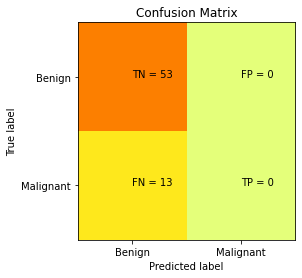

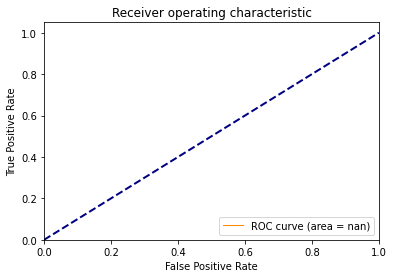


Acuuracy Of the Model:  0.803030303030303 




In [232]:
clf = SVC(kernel='rbf',C=1)
clf.fit(X_train,y_train)
report_performance(clf)
roc_curves(clf)
accuracy(clf)